### Importing necessary libraries

In [31]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading dataset

In [32]:
bike_counts_data = pd.read_csv('/home/shirleen/Documents/the_covid_bike_boom_analysis/bike_counts_14_counters.csv')
pedestrian_counts_data = pd.read_csv('/home/shirleen/Documents/the_covid_bike_boom_analysis/pedestrian_counts_14_counters.csv')
total_count_data = pd.read_csv('/home/shirleen/Documents/the_covid_bike_boom_analysis/total_count_data_31_counters.csv')


#### Cleaning dataset

In [33]:
bike_counts_data.dropna(inplace=True)

pedestrian_counts_data.dropna(inplace=True)

total_count_data.dropna(inplace=True)

#### Data integration

In [34]:
merged_data = pd.merge(bike_counts_data, pedestrian_counts_data, on="timeframe", suffixes=("_bike", "_pedestrian"))
merged_data = pd.merge(merged_data, total_count_data, on="timeframe")

merged_data


,timeframe,week_of_bike,2019_counts_14_counters_bike,2020_counts_14_counters_bike,change_2019_2020_bike,week_of_pedestrian,2019_counts_14_counters_pedestrian,2020_counts_14_counters_pedestrian,change_2019_2020_pedestrian,week_of,2019_counts_31_counters,2020_counts_31_counters,change_2019_2020
0,Week 1,2020-12-30,63100,47315,-0.25,2018-12-30,68957,93654,0.36,2020-12-30,167679,183546,0.094627
1,Week 2,2020-01-06,31703,25980,-0.18,2019-01-06,34778,46964,0.35,2020-01-06,82340,97140,0.179743
2,Week 3,2020-01-13,18082,19569,0.08,2019-01-13,32065,38302,0.19,2020-01-13,62315,75782,0.216112
3,Week 4,2020-01-20,26280,22907,-0.13,2019-01-20,35016,41506,0.19,2020-01-20,75801,83809,0.105645
4,Week 5,2020-01-27,24447,25713,0.05,2019-01-27,33627,46335,0.38,2020-01-27,75841,94738,0.249166
5,Week 6,2020-02-03,28308,34427,0.22,2019-02-03,35217,67437,0.91,2020-02-03,79780,153555,0.924731
6,Week 7,2020-02-10,21176,32574,0.54,2019-02-10,32171,50846,0.58,2020-02-10,65732,130351,0.983068
7,Week 8,2020-02-17,22085,47713,1.16,2019-02-17,36288,69353,0.91,2020-02-17,69492,149876,1.156737
8,Week 9,2020-02-24,28591,44536,0.56,2019-02-24,44410,64508,0.45,2020-02-24,85688,141250,0.648422
9,Week 10,2020-03-02,31425,63555,1.02,2019-03-03,65887,64326,-0.02,2020-03-02,84512,167528,0.982298


### Filtering data to focusing from specific period 

In [44]:
merged_data['week_of'] = pd.to_datetime(merged_data['week_of'])

filtered_data = merged_data[(merged_data['week_of'].dt.isocalendar().week >= 12) & ((merged_data['week_of'].dt.year == 2019) | (merged_data['week_of'].dt.year == 2020))]
filtered_data

,timeframe,week_of_bike,2019_counts_14_counters_bike,2020_counts_14_counters_bike,change_2019_2020_bike,week_of_pedestrian,2019_counts_14_counters_pedestrian,2020_counts_14_counters_pedestrian,change_2019_2020_pedestrian,week_of,2019_counts_31_counters,2020_counts_31_counters,change_2019_2020
0,Week 1,2020-12-30,63100,47315,-0.25,2018-12-30,68957,93654,0.36,2020-12-30,167679,183546,0.094627
11,Week 12,2020-03-16,20937,94145,3.50,2019-03-17,30298,117152,2.87,2020-03-16,125440,367795,1.932039
12,Week 13,2020-03-23,43560,69574,0.60,2019-03-24,68805,106175,0.54,2020-03-23,136330,372783,1.730000
13,Week 14,2020-03-30,22880,73814,2.23,2019-03-31,62779,113005,0.80,2020-03-30,118784,280728,1.360000
14,Week 15,2020-04-06,65750,81686,0.24,2019-04-07,83893,107420,0.28,2020-04-06,132033,419160,2.170000
15,Week 16,2020-04-13,44026,81775,0.86,2019-04-14,71677,122291,0.71,2020-04-13,133267,241810,0.810000
16,Week 17,2020-04-20,45732,84412,0.85,2019-04-21,87834,106246,0.21,2020-04-20,165777,231184,0.390000
17,Week 18,2020-04-27,50538,106090,1.10,2019-04-28,88284,109459,0.24,2020-04-27,166356,276982,0.660000
18,Week 19,2020-05-04,53183,96285,0.81,2019-05-05,94980,109391,0.15,2020-05-04,171049,244058,0.430000
19,Week 20,2020-05-11,52169,115579,1.22,2019-05-12,100251,119716,0.19,2020-05-11,178534,281348,0.580000


#### Visualizing the filtered data

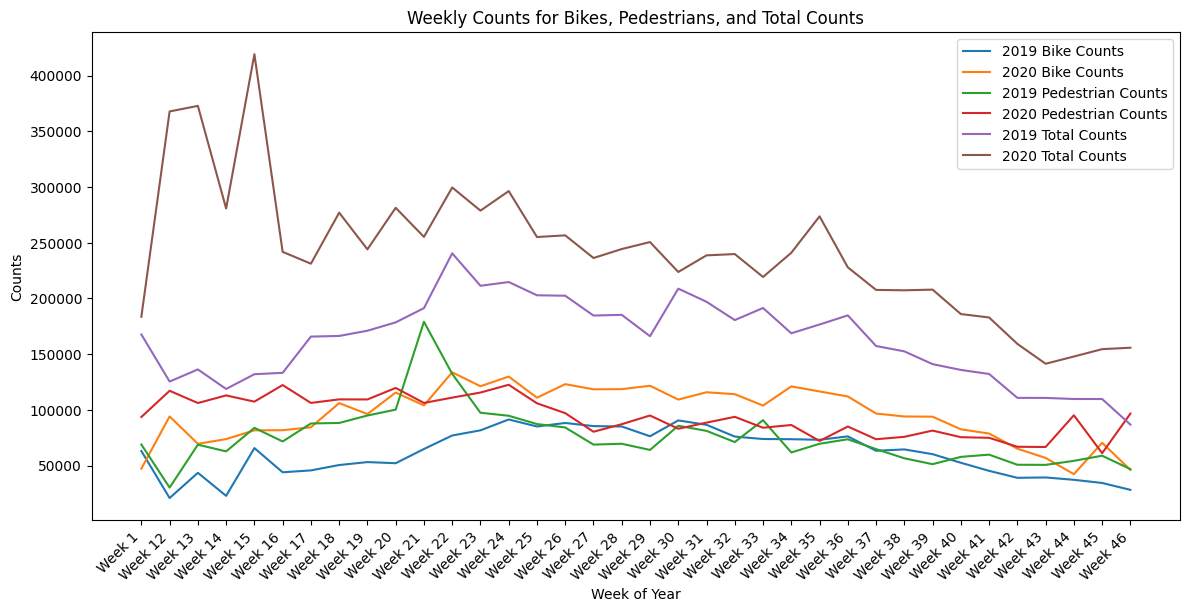

In [47]:
columns_to_plot = ['timeframe', '2019_counts_14_counters_bike', '2020_counts_14_counters_bike',
                   '2019_counts_14_counters_pedestrian', '2020_counts_14_counters_pedestrian',
                   '2019_counts_31_counters', '2020_counts_31_counters']

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2019_counts_14_counters_bike', label='2019 Bike Counts')
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2020_counts_14_counters_bike', label='2020 Bike Counts')
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2019_counts_14_counters_pedestrian', label='2019 Pedestrian Counts')
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2020_counts_14_counters_pedestrian', label='2020 Pedestrian Counts')
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2019_counts_31_counters', label='2019 Total Counts')
sns.lineplot(data=filtered_data[columns_to_plot], x='timeframe', y='2020_counts_31_counters', label='2020 Total Counts')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.xlabel('Week of Year')
plt.ylabel('Counts')
plt.title('Weekly Counts for Bikes, Pedestrians, and Total Counts')
plt.legend()

plt.show()